In [1]:
from RDF import *
from aflow import *
from math import pi
from pymatgen.core.structure import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


In [10]:
results = search(batch_size=20
        ).filter((K.Egap > 0.1) & (K.Egap < 2)
        ).filter(K.nspecies == 2
        ).filter(K.natoms < 5)
print(len(results))


1334


In [11]:
counter=0

X = []
Y = []
for result in results[0:11]:
    crystal = Structure.from_str(result.files['CONTCAR.relax.vasp'](), fmt='poscar')
    X.append(RDF(crystal).RDF[:,1])
    Y.append(result.Egap)
    
    if (counter % 10==0):
        print('Progress', counter, "/", len(results))
    counter += 1


Progress 0 / 1334
Progress 10 / 1334


In [12]:
len(Y)
print(X)

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 7.07797908, 0.93891559, 0.        ,
       2.15657175, 0.        , 0.        , 0.        , 0.        ,
       2.50377491, 1.14066605, 0.        , 1.91695267, 0.        ,
       4.90013936, 0.        , 0.2347289 , 0.1094099 , 0.        ,
       0.57448738, 0.71885725, 2.36582588, 1.27354641, 1.50226495,
       1.13597195, 0.53769892, 1.52931404, 0.72594657, 0.        ,
       1.31369986, 0.57378175, 1.39339339, 0.28516651, 2.72633268,
       1.21757296, 0.58315627, 0.63898422, 0.76646171, 1.61944161,
       0.42451547, 0.81668989, 0.78616215, 0.50487642, 1.58172359,
       1.6724434 , 0.96290143, 1.20350893, 1.3745228 , 0.8178998 ]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 6.19268035, 0.        , 0.        , 0.  

In [4]:
from tempfile import TemporaryFile
Youtfile = TemporaryFile()
np.save(Youtfile, Y)  #C:\Users\Katie\RDF_4_ML
Youtfile.seek(0) # Only needed here to simulate closing & reopening file


0

In [5]:
Ydata = np.load(Youtfile)

In [6]:
print(Ydata)

[0.1027 0.1027 0.1034 0.1045 0.1054 0.1072 0.1077 0.1113 0.1123 0.1127
 0.1141]


In [7]:
Xoutfile = TemporaryFile()
np.save(Xoutfile, X)  
Xoutfile.seek(0) # Only needed here to simulate closing & reopening file

0

In [8]:
Xdata = np.load(Xoutfile)

In [9]:
print(Xdata)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  7.07797908 0.93891559 0.         2.15657175 0.         0.
  0.         0.         2.50377491 1.14066605 0.         1.91695267
  0.         4.90013936 0.         0.2347289  0.1094099  0.
  0.57448738 0.71885725 2.36582588 1.27354641 1.50226495 1.13597195
  0.53769892 1.52931404 0.72594657 0.         1.31369986 0.57378175
  1.39339339 0.28516651 2.72633268 1.21757296 0.58315627 0.63898422
  0.76646171 1.61944161 0.42451547 0.81668989 0.78616215 0.50487642
  1.58172359 1.6724434  0.96290143 1.20350893 1.3745228  0.8178998 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.93311343
  1.6471499  0.35506165 0.6185963  0.54368815 2.64883362 1.50353266
  1.0602672  1.04388125 0.31561036 0.64703383 1.18398629 0.48327836
  1.05779967 1.08094212 0.90689272 1.24271577 1.1171143  0.92789444
  0.905204   1.1553

In [11]:
'''Machine Learning'''
#Split the data

from sklearn.cross_validation import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, random_state=10)

len(X_test)

C:\Users\Katie\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


783

In [18]:
len(Y_train)

2347

In [12]:
#implement KNeighborsRegressor---choose estimator

from sklearn.neighbors import KNeighborsRegressor
estimator = KNeighborsRegressor(4, weights='distance', algorithm='kd_tree', leaf_size=40, p=1)

In [23]:
#train data

import numpy as np
import matplotlib.pyplot as plt

estimator.fit(X_train,  Y_train)
y_predicted = estimator.predict(X_test)



#print(Y_test)
#print(y_predicted)

r2= estimator.score( X_test, Y_test, sample_weight=None)


print('r^2 = ', r2)

r^2 =  0.7357413378949806


r2= estimator.score( X_test, Y_test, sample_weight=None)


print('r^2 = ', r2)
#dir(KNeighborsRegressor)

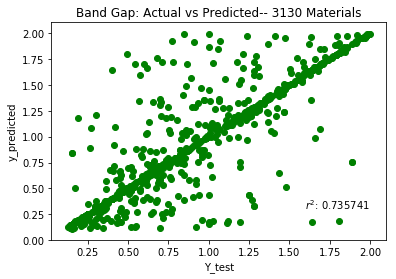

In [24]:
plt.scatter( y_predicted, Y_test, c='green')
plt.title('Band Gap: Actual vs Predicted-- 3130 Materials')
plt.text(1.6,.3, '$r^2$: 0.735741')
plt.xlabel('Y_test')
plt.ylabel('y_predicted')
plt.savefig('C:\\Users\\Katie\\Documents\\School\\ZhuGroup\\Egap3.png')
plt.show()



#plot ypredicted vs ytest on x axis

#read about pearson coefficients like r value

In [16]:
'''analyze outliers'''

'analyze outliers'

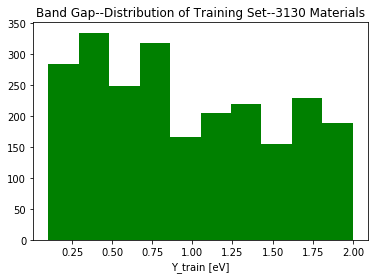

In [19]:
plt.hist( Y_train, color='green')
plt.title('Band Gap--Distribution of Training Set--3130 Materials')
plt.xlabel('Y_train [eV]')

plt.savefig('C:\\Users\\Katie\\Documents\\School\\ZhuGroup\\TrainEgap3.png')
plt.show()